In [59]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

db = pd.read_csv('./dados_sinteticos_com_erros_atualizado.csv')

db.head()

,id,data,hora,cliente,produto,valor_x,quantidade,total,status,cidade,...,cor,tamanho,peso,altura,largura,comprimento,categoria_y,valor_y,categoria,valor
0,1,2017-09-20,08:12:57,Filipe Cruz,Isotônico Coca-Cola,96.87,7,38.092982,em separação,Cidade,...,NaN,,83.75,12.89,35.11,56.99,bebidas,5.441855,bebidas,5.441855
1,2,2019-07-17,18:26:47,Daniel Silva,Lembrancinha Festa Box,92.21,7,123.142236,em trânsito,Cidade,...,NaN,,60.02,54.85,15.35,41.05,artigos para festas,17.591748,artigos para festas,17.591748
2,3,2018-01-20,15:55:07,Victor Silva,Convite Piffer,170.19,5,37.268889,cancelado,Cidade,...,NaN,,20.81,20.38,75.42,46.84,artigos para festas,7.453778,artigos para festas,7.453778
3,4,2016-06-21,11:36:07,Vanessa Rodrigues,Vinho Heineken,151.80,10,15.517708,entregue,Cidade,...,NaN,,44.59,4.68,32.67,91.61,bebidas,1.551771,bebidas,1.551771
4,5,2015-05-01,18:08:24,Luiz Bandeira,Chinelo Fila,82.24,7,326.226314,em separação,Cidade,...,amarelo,,92.52,57.52,33.77,49.21,calçados,46.603759,calçados,46.603759


In [60]:


db = db.drop_duplicates()

new_db = db.drop(columns=['valor_x', 'valor_y', 'categoria_y', 'categoria_x', 'cor'])

new_db.columns

Index(['id', 'data', 'hora', 'cliente', 'produto', 'quantidade', 'total',
       'status', 'cidade', 'estado', 'pais', 'cep', 'frete', 'pagamento',
       'vendedor', 'marca', 'modelo', 'tamanho', 'peso', 'altura', 'largura',
       'comprimento', 'categoria', 'valor'],
      dtype='object')

In [61]:
new_db.describe()

,id,quantidade,total,cep,frete,peso,altura,largura,comprimento,valor
count,214311.000000,214311.000000,214311.000000,2.143110e+05,214311.000000,214311.000000,214311.000000,214311.000000,214311.000000,214311.000000
mean,24997.598448,5.467750,781.741055,5.483700e+07,49.870262,50.169432,50.004779,49.978365,50.108208,142.862632
std,14433.807030,2.873557,1436.049722,2.592957e+07,28.761408,28.873023,28.818780,28.871345,28.736578,222.584472
min,1.000000,1.000000,1.145304,1.000192e+07,0.000000,0.100000,0.100000,0.100000,0.100000,1.145304
25%,12502.000000,3.000000,88.466471,3.251641e+07,24.910000,25.060000,24.995000,24.880000,25.210000,23.450809
50%,24969.000000,5.000000,231.616249,5.484179e+07,50.090000,50.300000,49.950000,49.820000,50.120000,44.808037
75%,37484.500000,8.000000,643.615711,7.699578e+07,74.560000,75.190000,75.040000,75.230000,75.040000,123.110750
max,50000.000000,10.000000,9791.562845,9.999804e+07,100.000000,100.000000,100.000000,100.000000,100.000000,979.156285


In [79]:
# db['id'].duplicated().sum()
# print(new_db['id'][new_db['id'].duplicated(keep=False)])

new_db['id'] = new_db['id'].drop_duplicates()
db_duplicatesRomove = new_db.dropna(subset=['id'])
db_duplicatesRomove.tail()

,id,data,hora,cliente,produto,quantidade,total,status,cidade,estado,...,vendedor,marca,modelo,tamanho,peso,altura,largura,comprimento,categoria,valor
214285,49996.0,2015-02-25,08:01:49,Filipe Cruz,Frost Free Britânia,9,2464.758184,pago,Cidade,AP,...,Loja 2,Britânia,Frost Free,,13.23,22.51,70.16,37.58,casa,273.862020
214286,49997.0,2015-04-26,18:17:53,Maycon Massi,Escrivaninha Móveis Kappesberg,5,1664.761710,aguardando pagamento,Cidade,MG,...,Loja 2,Móveis Kappesberg,Escrivaninha,,85.20,28.43,89.69,61.88,móveis,332.952342
214287,49998.0,2016-08-03,22:28:46,Júlio Silva,Maquiagem Eudora,10,161.050308,pago,Cidade,SE,...,Loja 1,Eudora,Maquiagem,,26.66,79.76,17.50,61.11,saúde,16.105031
214295,49999.0,2018-03-20,20:57:09,João Rodrigues,Câmera Sony,2,373.160749,em separação,Cidade,PB,...,Loja 2,Sony,Câmera,,89.93,33.67,95.64,28.79,eletrônicos,186.580374
214303,50000.0,2018-04-27,17:47:14,Pedro Soares,Raquete Olympikus,5,531.353100,entregue,Cidade,PR,...,Loja 1,Olympikus,Raquete,,50.71,93.06,0.26,66.74,esportes,106.270620


In [82]:
db_estado = db_duplicatesRomove.groupby('estado').count()

print(db_estado['estado'].dtype)

KeyError: 'estado'

TypeError: can only concatenate str (not "float") to str

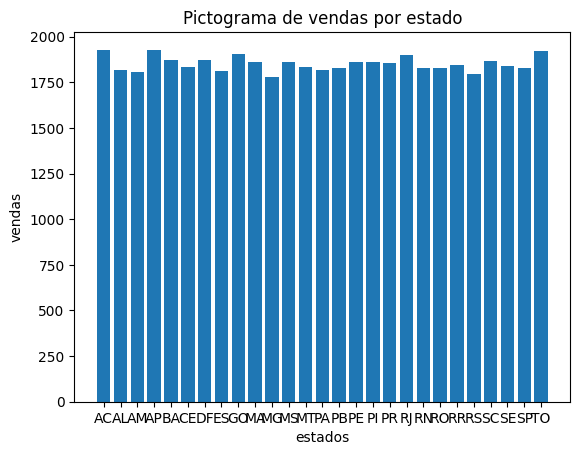

In [92]:
db_estado = db_duplicatesRomove.groupby('estado').count()
db_estado = db_duplicatesRomove.groupby('estado').agg({'estado': 'first', 'id': 'count'})
# db_estado.head()
estado = db_estado['estado']
vendas = db_estado['id']
plt.bar(estado, vendas)
plt.xlabel('estados')
plt.ylabel('vendas')
plt.title('Pictograma de vendas por estado')
for i, count in enumerate(estado):
    plt.text(i, count + 0.1, count, ha='center', va='bottom', fontsize=12)
plt.show()